In [1]:
%load_ext watermark
%watermark

2018-12-10T00:46:50-06:00

CPython 3.7.0
IPython 6.5.0

compiler   : GCC 7.2.0
system     : Linux
release    : 4.15.0-42-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


In [4]:
import pandas as pd

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12,12) # 10 pulgadas de ancho y 10 de alto para todos los plots

### Lectura de datos

In [6]:
vehiculos = pd.read_csv("../../Procesado_de_Datos/data/vehiculos.2.limpio_analisis.csv")

In [7]:
vehiculos.head()

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,co2
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,555.437500
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,16,555.437500


En este paso vamos a agregar aquellas variables que se puedan agregar en tipos más genéricos. Esto ayuda a analizar los por grupos en vez de por elementos individuales.

Para ello podemos ver el numero de valores distintos que cada variable categorica tiene

In [9]:
def unique_col_values(df):
    for column in df:
        print("{} | {} | {}".format(
            df[column].name, len(df[column].unique()), df[column].dtype
        ))

unique_col_values(vehiculos)

fabricante | 129 | object
modelo | 3734 | object
year | 35 | int64
desplazamiento | 66 | float64
cilindros | 10 | float64
transmision | 38 | object
traccion | 8 | object
clase | 34 | object
combustible | 13 | object
consumo | 49 | int64
co2 | 596 | float64


### Agrupacion de variables categoricas

##### Clase de vehiculo

In [10]:
vehiculos.clase.unique()

array(['Special Purpose Vehicle 2WD', 'Midsize Cars', 'Subcompact Cars',
       'Compact Cars', 'Sport Utility Vehicle - 4WD',
       'Small Sport Utility Vehicle 2WD',
       'Small Sport Utility Vehicle 4WD', 'Two Seaters',
       'Sport Utility Vehicle - 2WD', 'Special Purpose Vehicles',
       'Special Purpose Vehicle 4WD', 'Small Station Wagons',
       'Minicompact Cars', 'Midsize-Large Station Wagons',
       'Midsize Station Wagons', 'Large Cars',
       'Standard Sport Utility Vehicle 4WD',
       'Standard Sport Utility Vehicle 2WD', 'Minivan - 4WD',
       'Minivan - 2WD', 'Vans', 'Vans, Cargo Type',
       'Vans, Passenger Type', 'Standard Pickup Trucks 2WD',
       'Standard Pickup Trucks', 'Standard Pickup Trucks/2wd',
       'Small Pickup Trucks 2WD', 'Standard Pickup Trucks 4WD',
       'Small Pickup Trucks 4WD', 'Small Pickup Trucks', 'Vans Passenger',
       'Special Purpose Vehicle', 'Special Purpose Vehicles/2wd',
       'Special Purpose Vehicles/4wd'], dtype=object

In [12]:
pequeno = ['Compact Cars','Subcompact Cars','Two Seaters','Minicompact Cars']
medio = ['Midsize Cars']
grande = ['Large Cars']

vehiculos.loc[vehiculos['clase'].isin(pequeno), 
             'clase_tipo'] = 'Coches pequeños'

vehiculos.loc[vehiculos['clase'].isin(medio), 
             'clase_tipo'] = 'Coches Medianos'

vehiculos.loc[vehiculos['clase'].isin(grande), 
             'clase_tipo'] = 'Coches Grandes'

vehiculos.loc[vehiculos['clase'].str.contains('Truck'), 
             'clase_tipo'] = 'Camionetas'

vehiculos.loc[vehiculos['clase'].str.contains('Special Purpose'), 
             'clase_tipo'] = 'Vehículos Especiales'

vehiculos.loc[vehiculos['clase'].str.contains('Sport Utility'), 
             'clase_tipo'] = 'Deportivos'

vehiculos.loc[vehiculos['clase'].str.contains('Station'), 
             'clase_tipo'] = 'Coche Familiar'

vehiculos.loc[(vehiculos['clase'].str.lower().str.contains('van')),
             'clase_tipo'] = 'Furgoneta'

In [13]:
vehiculos.clase_tipo = vehiculos.clase_tipo.astype("category")

In [14]:
vehiculos.clase_tipo.dtype

CategoricalDtype(categories=['Camionetas', 'Coche Familiar', 'Coches Grandes',
                  'Coches Medianos', 'Coches pequeños', 'Deportivos',
                  'Furgoneta', 'Vehículos Especiales'],
                 ordered=False)

In [11]:
vehiculos.clase_tipo.value_counts()

Coches pequeños         13007
Camionetas               5439
Deportivos               5289
Coches Medianos          4261
Coche Familiar           2533
Vehículos Especiales     2214
Furgoneta                2211
Coches Grandes           1837
Name: clase_tipo, dtype: int64

##### Traccion

In [15]:
vehiculos.traccion.unique()

array(['2-Wheel Drive', 'Rear-Wheel Drive', 'Front-Wheel Drive',
       '4-Wheel or All-Wheel Drive', 'All-Wheel Drive', nan,
       '4-Wheel Drive', 'Part-time 4-Wheel Drive'], dtype=object)

Vemos que las tracciones pueden definirse como 2 o 4 ruedas. las pongo como texto ya que en realidad no son variables numericas, sino categorias

In [17]:
vehiculos["traccion_tipo"] = "dos"
vehiculos["traccion_tipo"][vehiculos.traccion.isin([
    "4-Wheel or All-Wheel Drive", "All-Wheel Drive",
    "4-Wheel Drive", "Part-time 4-Wheel Drive"
])] = "cuatro"

/home/erdvillegas/anaconda3/envs/Datascientist/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Este warning es un warning de que estamos alterando una copia de vehicles (vehicles_year), no vehicles.

para deshabilitar hacemos:

In [18]:
pd.set_option('chained_assignment',None)

o simplemente usar `loc` para asignar valores en pandas

In [19]:
vehiculos["traccion_tipo"] = "dos"

vehiculos.loc[vehiculos.traccion.isin([
    "4-Wheel or All-Wheel Drive", "All-Wheel Drive",
    "4-Wheel Drive", "Part-time 4-Wheel Drive"
]), "traccion_tipo"] = "cuatro"

Pandas tiene un dtype especial para variables categoricas llamado `category`. El especificar a pandas que un campo es una categoria en vez de un object (un string generalmente) amplia las funcionalidades que podemos usar.Además, las categorias en general ocupan menos espacio en memoria (si su cardinalidad no es muy elevada).

In [20]:
vehiculos.traccion_tipo = vehiculos.traccion_tipo.astype("category")

##### Transmision

In [21]:
vehiculos.transmision.unique()

array(['Automatic 3-spd', 'Automatic 4-spd', 'Manual 5-spd',
       'Automatic (S5)', 'Manual 6-spd', 'Automatic 5-spd',
       'Automatic (AM8)', 'Automatic (AM-S8)', 'Automatic (AV-S7)',
       'Automatic (S6)', 'Automatic (S9)', 'Automatic (AM-S7)',
       'Automatic (S4)', 'Automatic (AM-S9)', 'Automatic (S7)',
       'Automatic (AM7)', 'Automatic (AM6)', 'Automatic 6-spd',
       'Automatic 8-spd', 'Manual 4-spd', 'Automatic (S8)',
       'Manual 7-spd', 'Automatic (AM-S6)', 'Auto(AM-S6)',
       'Automatic (variable gear ratios)', 'Automatic (AV-S8)',
       'Automatic (A1)', 'Automatic (AV-S6)', 'Manual 3-spd',
       'Automatic (S10)', 'Automatic 9-spd', 'Manual 4-spd Doubled', nan,
       'Automatic (L4)', 'Automatic (L3)', 'Automatic (AV-S10)',
       'Automatic 7-spd', 'Automatic (AM5)'], dtype=object)

Vemos que las transmisiones se pueden agregar en manual o automatica

In [22]:
vehiculos['transmision_tipo'] = "Automatica"

vehiculos.loc[vehiculos['transmision'].str.startswith('M'),
             'transmision_tipo'] = "Manual"

ValueError: cannot index with vector containing NA / NaN values

Vemos que hay un fallo (lo descubrimos en el paso 2 (QA), esto se debe a que hay vehiculos sin datos de la transmission.

In [23]:
vehiculos[vehiculos['transmision'].isnull()]

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,co2,clase_tipo,traccion_tipo,transmision_tipo
12835,Ford,F150 Pickup 2WD,1984,5.8,8.0,NaN,2-Wheel Drive,Standard Pickup Trucks 2WD,Regular,11,807.909091,Camionetas,dos,Automatica
14751,GMC,C25 Pickup 2WD,1984,4.1,6.0,NaN,2-Wheel Drive,Standard Pickup Trucks 2WD,Regular,14,634.785714,Camionetas,dos,Automatica


Podemos filtrar un dataframes por varias condiciones a la vez. Para ello usamos el operador `&` entre ellas para indicar un `and` o un  `|` para indicar un `or`

In [24]:
vehiculos['transmision_tipo'] = "Automatica"
vehiculos['transmision_tipo'][
    (vehiculos['transmision'].notnull()) & (vehiculos['transmision'].str.startswith('M'))
] = "Manual"

In [25]:
vehiculos.transmision_tipo = vehiculos.transmision_tipo.astype("category")

In [26]:
vehiculos.transmision_tipo.value_counts()

Automatica    24937
Manual        11854
Name: transmision_tipo, dtype: int64

##### Combustible

In [27]:
vehiculos.combustible.value_counts()

Regular                        24078
Premium                        10206
Gasoline or E85                 1215
Diesel                           933
Premium or E85                   124
Midgrade                          77
CNG                               60
Premium and Electricity           30
Gasoline or natural gas           20
Regular Gas and Electricity       20
Premium Gas or Electricity        18
Gasoline or propane                8
Regular Gas or Electricity         2
Name: combustible, dtype: int64

In [29]:
vehiculos['combustible_tipo'] = 'Otros tipos de combustible'
vehiculos.loc[vehiculos['combustible']=='Regular',
             'combustible_tipo'] = 'Normal'
vehiculos.loc[vehiculos['combustible']=='Premium',
             'combustible_tipo'] = 'Premium'

vehiculos.loc[vehiculos['combustible'].str.contains('Electricity'),
             'combustible_tipo'] = 'Hibrido'

In [30]:
vehiculos.combustible_tipo = vehiculos.combustible_tipo.astype("category")

In [31]:
vehiculos.combustible_tipo.value_counts()

Normal                        24078
Premium                       10206
Otros tipos de combustible     2437
Hibrido                          70
Name: combustible_tipo, dtype: int64

In [32]:
vehiculos.head()

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706,Vehículos Especiales,dos,Automatica,Normal
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,Vehículos Especiales,dos,Automatica,Normal
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,555.437500,Vehículos Especiales,dos,Automatica,Normal
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,Vehículos Especiales,dos,Automatica,Normal
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,16,555.437500,Coches Medianos,dos,Automatica,Premium


### Agrupar variables continuas.

Una manera sencilla de convertir variables continuas en otras categoricas es mediante el uso de quintiles.

In [33]:
tipos_tamaño_motor = ['muy pequeño',"pequeño",  "mediano", "grande", "muy grande"]

vehiculos['tamano_motor_tipo'] = pd.qcut(vehiculos['desplazamiento'],
                                  5, tipos_tamaño_motor)

In [34]:
tipos_consumo = ['muy bajo', 'bajo', 'moderado', 'alto', 'muy alto']

vehiculos['consumo_tipo'] = pd.qcut(vehiculos['consumo'],
                                  5, tipos_consumo)

In [35]:
tipos_co2 = ['muy bajo', 'bajo', 'moderado', 'alto', 'muy alto']

vehiculos['co2_tipo'] = pd.qcut(vehiculos['co2'],
                                  5, tipos_co2)

In [36]:
vehiculos.head()

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,bajo,alto
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy bajo,muy alto
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,muy bajo,alto
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy bajo,muy alto
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,16,555.437500,Coches Medianos,dos,Automatica,Premium,grande,muy bajo,alto


Al ver las primeras filas veo algo que me parece raro. Veo que tipo_consumo y tipo_co2 estan correlacionadas negativamente. Es decir, para cada coche, aquellos con un consumo bajo tienen un co2 alto y viceversa. Sin ser un experto en coches, la lógica me diria lo contrario, es decir, que aquellos coches que mas gasolina consumen son aquellos que mas contaminan.

En este momento lo mejor es visualizar la relacion de dichas variables y ver como están relacionadas. Éste es un ejemplo de como el EDA no es un proceso lineal.

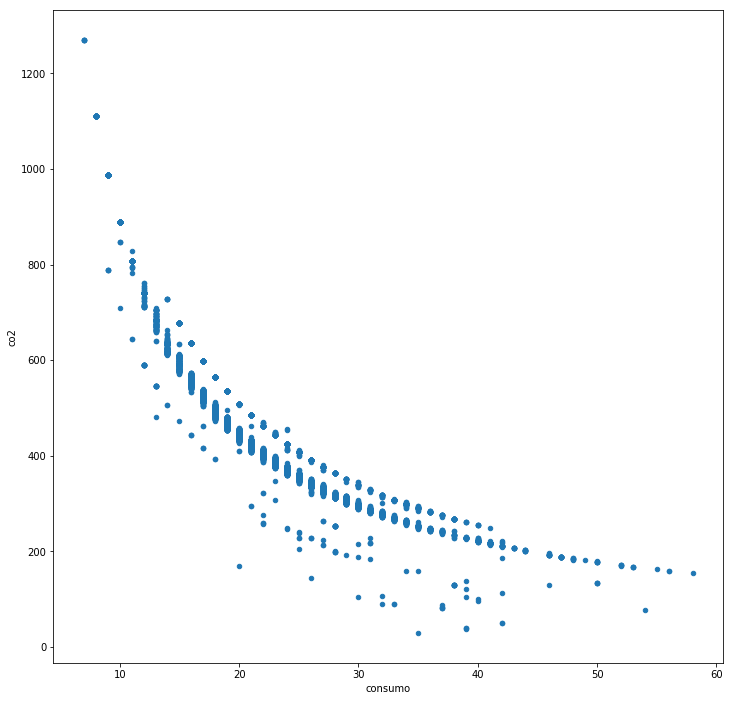

In [38]:
vehiculos.plot.scatter(x="consumo",y="co2")

Que raro es esto no? Nuestra intuicion nos dice que aquellos coches que consumen mas son aquellos que deberian contaminar mas.

En la descripción del dataset, se ve que CO2 se mide en gramos por milla, mientras que el consumo se mide en millas por gallon.

Lo que debemos hacer es convertir el consumo a galones por milla y asi ambas variables son relativas a la milla y podemos compararlas.

In [39]:
litros_por_galon =  3.78541

vehiculos["consumo_litros_milla"] = litros_por_galon/ vehiculos.consumo

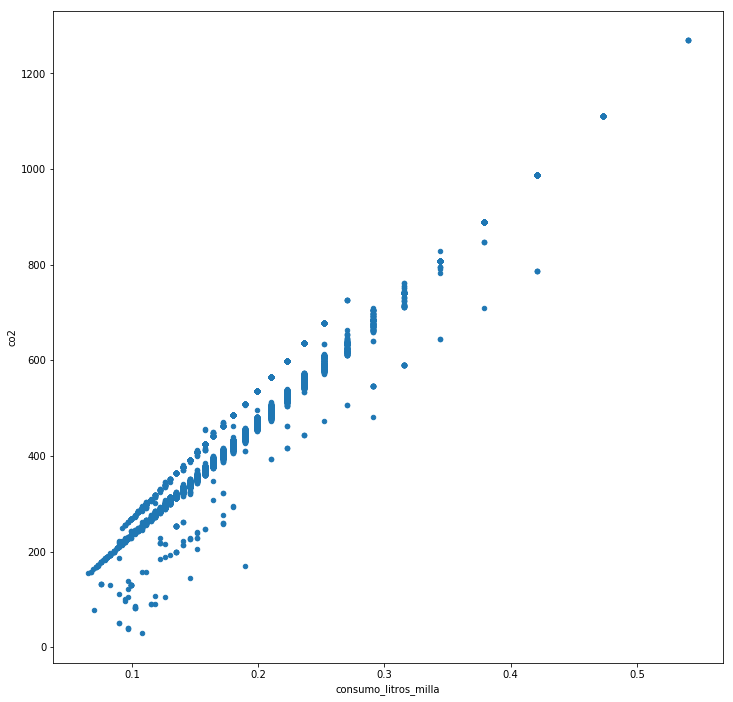

In [40]:
vehiculos.plot.scatter(x="consumo_litros_milla",y="co2");

Volvemos a calcular los niveles de consumo con la nueva variable

In [41]:
tipos_consumo = ['muy bajo', 'bajo', 'moderado', 'alto', 'muy alto']

vehiculos['consumo_tipo'] = pd.qcut(vehiculos['consumo_litros_milla'],
                                  5, labels=tipos_consumo)

vehiculos.consumo_tipo.head()

0        alto
1    muy alto
2        alto
3    muy alto
4        alto
Name: consumo_tipo, dtype: category
Categories (5, object): [muy bajo < bajo < moderado < alto < muy alto]

In [42]:
vehiculos.head()

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,16,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


Esto ya tiene más sentido! Ahora que tenemos los grupos guardamos el dataframe

In [43]:
vehiculos.dtypes

fabricante                object
modelo                    object
year                       int64
desplazamiento           float64
cilindros                float64
transmision               object
traccion                  object
clase                     object
combustible               object
consumo                    int64
co2                      float64
clase_tipo              category
traccion_tipo           category
transmision_tipo        category
combustible_tipo        category
tamano_motor_tipo       category
consumo_tipo            category
co2_tipo                category
consumo_litros_milla     float64
dtype: object

### Conclusion

- La variable `consumo` esta definida en millas por galon y la variable `co2` está definida como gramos por milla. Dado que el co2 es la variable principal del dataset, hemos creado la variable `consumo_litros_milla` definida como litros por milla para poder comparar con `co2`

### Exportar

Generalmente, un formato muy extendido para guardar datos es csv. Esto, que normalmente no es mala idea, no es recomendable entre pasos cuando se está trabajando con python y pandas.

CSV (o `Comma Separated Values`, es decir, Valores separados por comma), es un formato muy simple, que en general consiste de un elemento for fila, y cada campo separado por una coma.

El principal problema que esto tiene es que al guardar datos en csv se pierden todos los datos que pandas a obtenido sobre el dataframe (por ejemplo, que tipo de variable se guarda en cada columna, o que variables son categóricas).

Mi recomendación es usar un formato nativo de python para guardar dataframes entre pasos, y guardar los datos finales a un formato como csv, para que se puedan compartir con otras personas que no usen python.

El formato standard de serialización en Python (y serialización significa básicamente guardar un archivo al disco duro) es `pickle`. Pandas puede leer y escribir a pickle sin problemas, y al leer un archivo pickle es como si nunca hubiesemos cerrado el jupyter notebook, el dataframe no habrá perdido ninguna propiedad.

In [44]:
vehiculos.to_pickle("../../Procesado_de_Datos/data/vehiculos.3.variables_agrupadas.pkl")